# Data Visualization Techniques - Continued

## Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib as mpl

#using following parameters, the properties can be applied to all cthe figures generated
mpl.rcParams['font.size'] = 6
mpl.rcParams['figure.figsize'] = (9,6)
mpl.rcParams['figure.dpi'] = 100

## Line Graph with shaded area

In [12]:
# read the data
df = pd.read_csv('dataset_covid/Covid19_LEACases_Mapped_Historic_Records.csv')
df.head()

# extract month from the date column
df['month'] = pd.DatetimeIndex(df['EventDate']).month
#extract year from the date column
df['year'] = pd.DatetimeIndex(df['EventDate']).year

# extract columns to be plotted
df = df[(df.year == 2021 )]
df = df[(df.month >=3)]
df['date'] = pd.DatetimeIndex(df['EventDate']).date
# get all data for LIMERICK county
df1 = df[(df.COUNTY == 'OFFALY' )]

# converting to date format

date = df1['date'].unique()
df

,OBJECTID,LE_ID,ENGLISH,COUNTY,GUID,P14_100k,EventDate,month,year,date
4814,4815,13160403,RATOATH LEA-7,MEATH,2ae19629-3f1b-13a3-e055-000000000001,258.1,2021/03/01 00:00:00+00,3,2021,2021-03-01
4815,4816,13210401,ROSCREA-TEMPLEMORE LEA-4,TIPPERARY,2ae19629-3f2d-13a3-e055-000000000001,162.7,2021/03/01 00:00:00+00,3,2021,2021-03-01
4816,4817,13180401,TULLAMORE LEA-7,OFFALY,2ae19629-3f22-13a3-e055-000000000001,459.5,2021/03/01 00:00:00+00,3,2021,2021-03-01
4817,4818,1360401,TUAM LEA-7,GALWAY,2ae19629-3f49-13a3-e055-000000000001,111.5,2021/03/01 00:00:00+00,3,2021,2021-03-01
4818,4819,13100400,BORRIS-IN-OSSORY -MOUNTMELLICK LEA-6,LAOIS,2ae19629-3eff-13a3-e055-000000000001,125.0,2021/03/01 00:00:00+00,3,2021,2021-03-01
...,...,...,...,...,...,...,...,...,...,...
6137,6138,1350405,LETTERKENNY LEA-7,DONEGAL,2ae19629-3ef4-13a3-e055-700012002301,325.6,2021/04/19 00:00:00+00,4,2021,2021-04-19
6138,6139,1380401,CELBRIDGE LEA-4,KILDARE,2ae19629-3f70-13a3-e055-000000000001,166.5,2021/04/19 00:00:00+00,4,2021,2021-04-19
6139,6140,1330400,ENNISTIMON LEA-4,CLARE,2ae19629-3f5f-13a3-e055-000000000001,0.0,2021/04/19 00:00:00+00,4,2021,2021-04-19
6140,6141,1370403,KENMARE LEA-6,KERRY,2ae19629-3f6e-13a3-e055-000000000001,0.0,2021/04/19 00:00:00+00,4,2021,2021-04-19


In [13]:
# only copying certain columns into a new dataset
df1 = df1[['P14_100k','ENGLISH','date']].copy()

# get a single county in new dataframe
df2 = df1[(df1.ENGLISH == 'TULLAMORE LEA-7')]
# incidence rate for Ireland taken from https://ourworldindata.org/grapher/biweekly-covid-cases-per-million-people
avge = [1999.07, 1601.254, 1426.345, 1512.416, 1571.956, 1487.911, 1266.152, 1102.719]

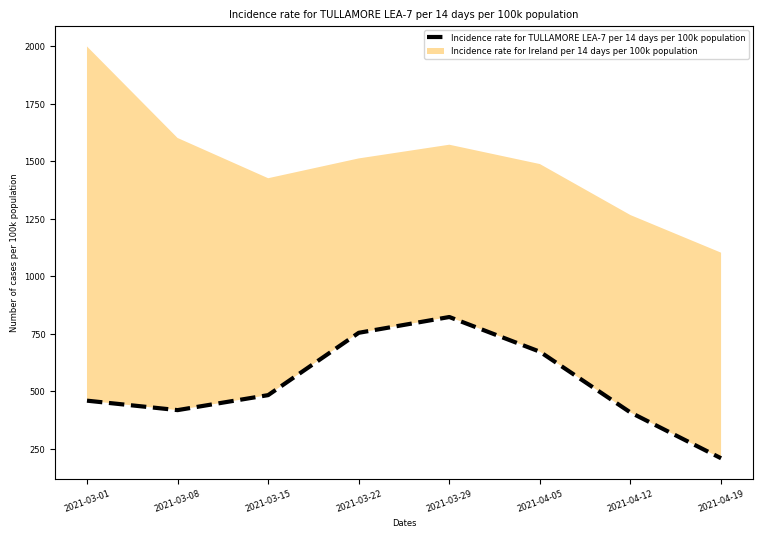

In [14]:
# plotting the line graph
plt.plot(df2['date'],df2['P14_100k'],'k--', linewidth=3, label='Incidence rate for TULLAMORE LEA-7 per 14 days per 100k population')
plt.xticks(df2['date'].to_list(), rotation=20)
plt.title('Incidence rate for TULLAMORE LEA-7 per 14 days per 100k population')
plt.xlabel('Dates')
plt.ylabel('Number of cases per 100k population')

# calculate the std of the values in column 
a = np.std(df2['P14_100k'])
plt.fill_between(df2['date'], df2['P14_100k'],avge, facecolor='orange', alpha=0.4, label='Incidence rate for Ireland per 14 days per 100k population')
plt.legend()
plt.show()


## Line graph with different y axis

([<matplotlib.axis.XTick at 0x7f9ca4f84c10>,
 <a list of 48 Text xticklabel objects>)

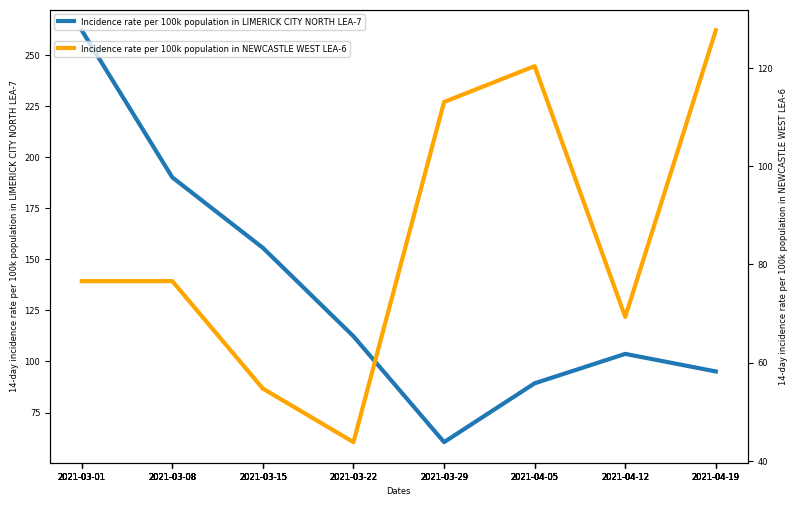

In [15]:
# get data from df for a single LEA
df2 = df[(df.COUNTY == 'LIMERICK')]
temp1 = df2[(df2.ENGLISH == 'LIMERICK CITY NORTH LEA-7')]

# get data from dataframe for another LEA
temp2 = df[(df.ENGLISH == 'NEWCASTLE WEST LEA-6')]

fig,ax = plt.subplots()
# make a plot
ax = plt.axes()
ax.plot(temp1['date'], temp1['P14_100k'], linewidth=3, label='Incidence rate per 100k population in LIMERICK CITY NORTH LEA-7')
ax.set_ylabel('14-day incidence rate per 100k population in LIMERICK CITY NORTH LEA-7')
ax.legend(loc='upper left')

# twinx() is used to use the axis as a twin 
ax2=ax.twinx()

# make a plot with different y-axis using second axis object
ax2.plot(temp1['date'], temp2['P14_100k'], linewidth=3, color='orange', label='Incidence rate per 100k population in NEWCASTLE WEST LEA-6')
ax2.set_ylabel('14-day incidence rate per 100k population in NEWCASTLE WEST LEA-6')
ax.set_xlabel('Dates')
ax2.legend(loc='upper left',bbox_to_anchor=(0, 0.94))
plt.xticks(df2['date'].to_list(), rotation=20)


## Grouped Bar Graph with line graph

In [17]:
#declare a new dataframe to read the data
df = pd.read_csv('dataset_covid/India covid data.csv')
df.head()
df

,Day,cum,vaccine,deaths,change,new
0,2021-05-01,19557457,2146620,3417,96.693382,371040.7143
1,2021-05-04,20664979,1839692,3980,71.428819,381123.7143
2,2021-05-07,21892676,1981076,4077,48.163433,389672.4286
3,2021-05-10,22992517,2301699,4205,29.601061,387097.7143
4,2021-05-13,24046809,2065202,3890,12.279728,365030.1429
5,2021-05-16,25228996,1816898,4329,-0.316373,328984.0000
6,2021-05-19,26031991,1360720,4209,-13.150780,295539.2857
7,2021-05-22,26752447,1352605,4454,-23.545392,263722.1429


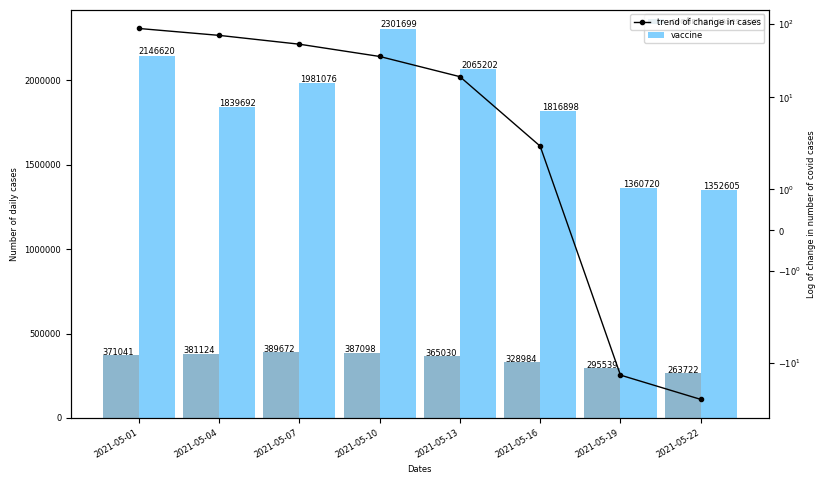

In [18]:
fig,ax = plt.subplots()

barWidth = 0.45
 
# set heights of bars
bars1 = df['new'].tolist()
bars2 = df["vaccine "].tolist()
bars3 = df['deaths ']
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
# make a plot
ax = plt.axes()
ax.bar(r1-barWidth/2, bars1, color='#8DB6CD', width=barWidth, label='confirmed cases cum')
ax.bar(r1+barWidth/2, bars2, color='#82CFFD', width=barWidth, label='vaccine')
ax.set_ylabel('Number of daily cases')
ax.legend(loc='upper right')

# get a new axis for two different y axis
ax2=ax.twinx()

# calculate log of change column
z = np.polyfit(r1, df['change'], 1)
p = np.poly1d(z)

# plot the log of change column 
ax2.plot(df['Day'],p(r1),"o-", linewidth=1, color="black", markersize=3, label='trend of change in cases')
ax2.set_ylabel('Log of change in number of covid cases')
ax.set_xlabel('Dates')
plt.yscale('symlog')
ax2.legend(loc='upper right')
# autofmt_xdate() is sued when we want to fit the x-tixks as dates to fit the image
fig.autofmt_xdate()
for p in ax.patches:
    ax.annotate(str(round(p.get_height())), (p.get_x() * 1.005, p.get_height() * 1.005))